# 1 Modelo - Ana

#

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df_tratado = pd.read_csv("ocorrencias_aereas_tratadas.csv", encoding='latin1', sep=',')
display(df_tratado)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_voo_destino,aeronave_tipo_operacao,ocorrencia_ano,idade,outlier_ocorrencia_latitude,outlier_ocorrencia_longitude,outlier_aeronave_pmd,outlier_aeronave_assentos,outlier_aeronave_ano_fabricacao,cluster
0,86954,ACIDENTE,-29.085556,-29.085556,TUPANCIRETÃÂ,RS,BRASIL,SIPJ,04/04/2025,17:20:00,...,SANTA MARIA,PRIVADA,2025,35.0,normal,normal,normal,normal,normal,0
1,86953,ACIDENTE,-9.596944,-9.596944,PILAR,AL,BRASIL,FAER,04/04/2025,09:05:00,...,FORA DE AERODROMO,AGRÃÂCOLA,2025,15.0,normal,normal,normal,normal,normal,0
2,86952,INCIDENTE,-2.586944,-2.586944,SÃÂO LUÃÂS,MA,BRASIL,SBSL,03/04/2025,20:45:00,...,MARECHAL CUNHA MACHADO,EXPERIMENTAL,2025,11.0,normal,normal,normal,normal,normal,0
3,86951,INCIDENTE GRAVE,-27.133889,-27.133889,CHAPECÃÂ,SC,BRASIL,SBCH,31/03/2025,22:30:00,...,SERAFIN ENOSS BERTASO,REGULAR,2025,14.0,normal,normal,normal,normal,normal,1
4,86950,INCIDENTE,-23.435556,-23.435556,GUARULHOS,SP,BRASIL,SBGR,05/04/2025,11:00:00,...,GOVERNADOR ANDRÃÂ FRANCO MONTORO,REGULAR,2025,4.0,normal,normal,normal,normal,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13145,28377,ACIDENTE,-5.460139,-5.460139,IMPERATRIZ,MA,BRASIL,FAER,27/01/2007,11:18:00,...,COMANDANTE CARLOS INÃÂCIO AGNES,PRIVADA,2007,37.0,normal,normal,normal,normal,normal,0
13146,28375,ACIDENTE,-23.612222,-23.612222,APUCARANA,PR,BRASIL,FAER,26/01/2007,18:15:00,...,CONGONHAS,TÃÂXI AÃÂREO,2007,1.0,normal,normal,normal,normal,normal,0
13147,28355,ACIDENTE,-17.254167,-17.254167,BOCAIÃÂVA,MG,BRASIL,FAER,18/01/2007,09:10:00,...,MÃÂRIO RIBEIRO,TÃÂXI AÃÂREO,2007,41.0,normal,normal,normal,normal,normal,0
13148,28335,ACIDENTE,-23.344444,-23.344444,LONDRINA,PR,BRASIL,FAER,19/01/2007,12:30:00,...,GOVERNADOR JOSÃÂ RICHA,PRIVADA,2007,21.0,normal,normal,normal,normal,normal,0


In [ ]:
# Defina a coluna alvo (substitua 'target' pelo nome correto)
target_col = 'ocorrencia_classificacao' 

# Separe features e alvo
X = df_tratado.drop(columns=[target_col])
y = df_tratado[target_col]

# Se necessário, transforme variáveis categóricas em dummies
X = pd.get_dummies(X)

# Divida em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest:
                 precision    recall  f1-score   support

       ACIDENTE       0.71      0.80      0.75       568
      INCIDENTE       0.89      0.96      0.92      1826
INCIDENTE GRAVE       0.28      0.03      0.05       236

       accuracy                           0.84      2630
      macro avg       0.63      0.60      0.58      2630
   weighted avg       0.80      0.84      0.81      2630

[[ 457  104    7]
 [  71 1744   11]
 [ 115  114    7]]


In [ ]:
# 2. Regressão Logística
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

KeyboardInterrupt: 

In [ ]:
# Calcula o peso da classe negativa em relação à positiva (ou vice-versa)
from collections import Counter

counts = Counter(y_train)
scale = counts[0] / counts[1] if counts[0] > counts[1] else counts[1] / counts[0]

model_xgb = XGBClassifier(scale_pos_weight=scale, use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

ZeroDivisionError: division by zero

In [ ]:
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier(class_weight='balanced', random_state=42)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)

print("LightGBM:\n", classification_report(y_test, y_pred_lgb))

LightGBMError: Do not support special JSON characters in feature name.

# 2. Modelo de Predição - Probabilidade de Acidente por Idade da Aeronave

Este modelo analisa a relação entre a idade da aeronave e a probabilidade de acidentes/incidentes graves, permitindo prever qual tipo de ocorrência é mais provável baseado na idade da aeronave.

In [ ]:
# Carregando os dados
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Carregando o dataset principal
df = pd.read_csv("ocorrencias_aereas_merged.csv", encoding='latin1')

print(f"Dataset carregado com {df.shape[0]} registros e {df.shape[1]} colunas")
print("\nPrimeiras 5 linhas:")
display(df.head())

Dataset carregado com 13151 registros e 29 colunas

Primeiras 5 linhas:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,...,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao
0,86954,ACIDENTE,-29.085556,-53.865556,TUPANCIRETÃ,RS,BRASIL,SIPJ,04/04/2025,17:20:00,...,Leve,4.0,1990.0,BRASIL,BRASIL,AVIÃO,NaN,Aero Parque TupÃ£,SANTA MARIA,PRIVADA
1,86953,ACIDENTE,-9.596944,-35.969722,PILAR,AL,BRASIL,FAER,04/04/2025,09:05:00,...,Leve,1.0,2010.0,BRASIL,BRASIL,AVIÃO,NaN,FORA DE AERODROMO,FORA DE AERODROMO,AGRÃCOLA
2,86952,INCIDENTE,-2.586944,-44.236111,SÃO LUÃS,MA,BRASIL,SBSL,03/04/2025,20:45:00,...,Leve,NaN,2014.0,BRASIL,BRASIL,AVIÃO,NaN,AERODROMO DE PARAGOMINAS,MARECHAL CUNHA MACHADO,EXPERIMENTAL
3,86951,INCIDENTE GRAVE,-27.133889,-52.658889,CHAPECÃ,SC,BRASIL,SBCH,31/03/2025,22:30:00,...,Pesado,154.0,2011.0,BRASIL,BRASIL,AVIÃO,NaN,GOVERNADOR ANDRÃ FRANCO MONTORO,SERAFIN ENOSS BERTASO,REGULAR
4,86950,INCIDENTE,-23.435556,-46.473056,GUARULHOS,SP,BRASIL,SBGR,05/04/2025,11:00:00,...,Pesado,0.0,2021.0,BRASIL,BRASIL,AVIÃO,NaN,SENADOR PETRÃNIO PORTELLA,GOVERNADOR ANDRÃ FRANCO MONTORO,REGULAR


Distribuição das ocorrências:
ocorrencia_classificacao
INCIDENTE          7559
ACIDENTE           2595
INCIDENTE GRAVE    1093
Name: count, dtype: int64


Estatísticas descritivas da idade das aeronaves:
count    11247.000000
mean        28.301592
std         16.367270
min          0.000000
25%         15.000000
50%         25.000000
75%         43.000000
max         94.000000
Name: idade_aeronave, dtype: float64


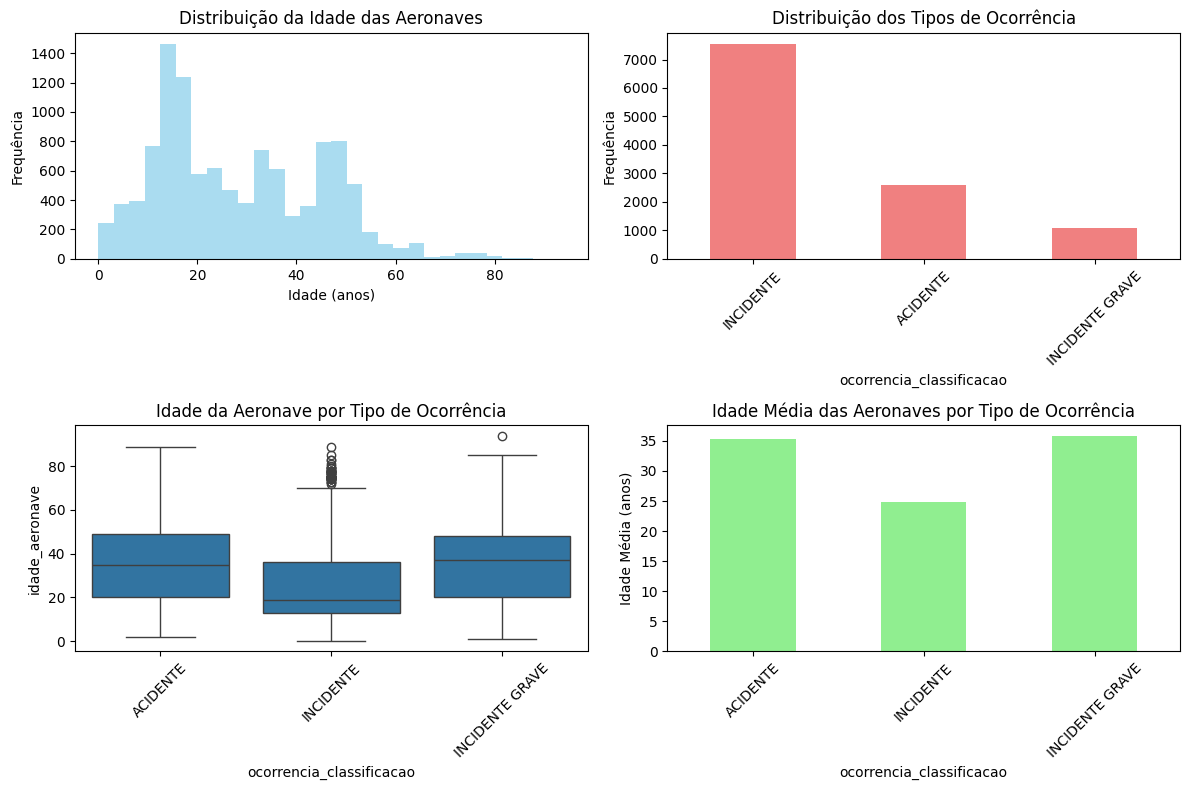


Idade média por tipo de ocorrência:
ocorrencia_classificacao
ACIDENTE           35.305588
INCIDENTE          24.812806
INCIDENTE GRAVE    35.800549
Name: idade_aeronave, dtype: float64


In [ ]:
# Preparando os dados para análise da idade da aeronave
# Calculando a idade da aeronave
ano_atual = 2025
df['idade_aeronave'] = ano_atual - df['aeronave_ano_fabricacao']

# Removendo valores nulos importantes
df_clean = df.dropna(subset=['aeronave_ano_fabricacao', 'ocorrencia_classificacao'])

# Analisando a distribuição das classificações de ocorrência
print("Distribuição das ocorrências:")
print(df_clean['ocorrencia_classificacao'].value_counts())
print("\n")

# Analisando a distribuição das idades das aeronaves
print("Estatísticas descritivas da idade das aeronaves:")
print(df_clean['idade_aeronave'].describe())

# Visualizando a distribuição da idade das aeronaves
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df_clean['idade_aeronave'], bins=30, alpha=0.7, color='skyblue')
plt.title('Distribuição da Idade das Aeronaves')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')

# Distribuição por tipo de ocorrência
plt.subplot(2, 2, 2)
df_clean['ocorrencia_classificacao'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribuição dos Tipos de Ocorrência')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Boxplot da idade por tipo de ocorrência
plt.subplot(2, 2, 3)
sns.boxplot(data=df_clean, x='ocorrencia_classificacao', y='idade_aeronave')
plt.title('Idade da Aeronave por Tipo de Ocorrência')
plt.xticks(rotation=45)

# Média da idade por tipo de ocorrência
plt.subplot(2, 2, 4)
idade_media = df_clean.groupby('ocorrencia_classificacao')['idade_aeronave'].mean()
idade_media.plot(kind='bar', color='lightgreen')
plt.title('Idade Média das Aeronaves por Tipo de Ocorrência')
plt.ylabel('Idade Média (anos)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nIdade média por tipo de ocorrência:")
print(idade_media)

Análise de Probabilidade por Faixa Etária:

Tabela Cruzada - Faixa Etária vs Tipo de Ocorrência:
ocorrencia_classificacao  ACIDENTE  INCIDENTE  INCIDENTE GRAVE
faixa_etaria                                                  
Jovem (6-10 anos)               60        635               29
Madura (11-20 anos)            607       2914              236
Muito Velha (>30 anos)        1520       2706              694
Nova (0-5 anos)                 11        398                9
Velha (21-30 anos)             397        906              125


Probabilidades por Faixa Etária (%):
ocorrencia_classificacao  ACIDENTE  INCIDENTE  INCIDENTE GRAVE
faixa_etaria                                                  
Jovem (6-10 anos)             8.29      87.71             4.01
Madura (11-20 anos)          16.16      77.56             6.28
Muito Velha (>30 anos)       30.89      55.00            14.11
Nova (0-5 anos)               2.63      95.22             2.15
Velha (21-30 anos)           27.80      63.45

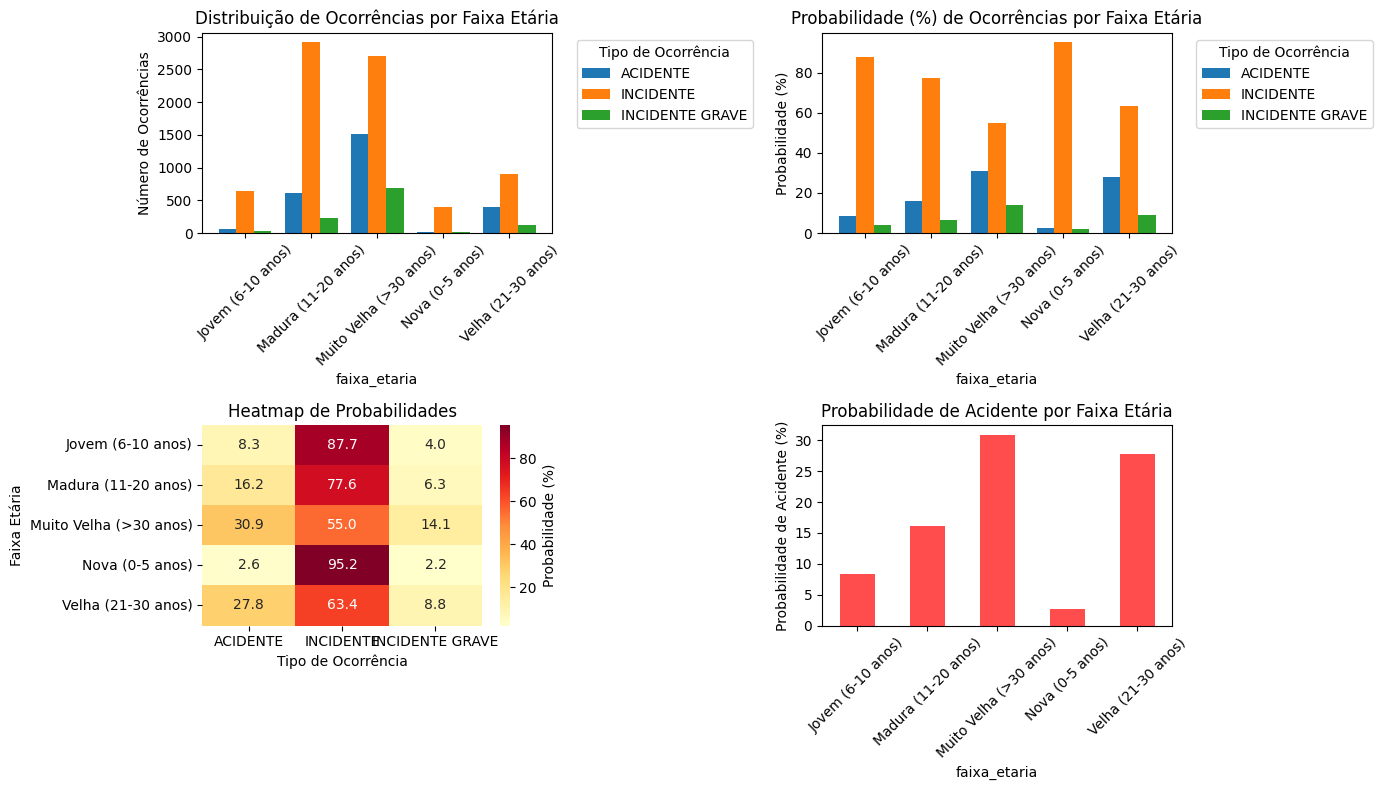

Probabilidade de Acidente por Faixa Etária:
Jovem (6-10 anos): 8.29%
Madura (11-20 anos): 16.16%
Muito Velha (>30 anos): 30.89%
Nova (0-5 anos): 2.63%
Velha (21-30 anos): 27.80%


In [ ]:
# Criando faixas etárias da aeronave para análise de probabilidade
def criar_faixa_etaria(idade):
    if idade <= 5:
        return 'Nova (0-5 anos)'
    elif idade <= 10:
        return 'Jovem (6-10 anos)'
    elif idade <= 20:
        return 'Madura (11-20 anos)'
    elif idade <= 30:
        return 'Velha (21-30 anos)'
    else:
        return 'Muito Velha (>30 anos)'

df_clean['faixa_etaria'] = df_clean['idade_aeronave'].apply(criar_faixa_etaria)

# Análise de probabilidade por faixa etária
print("Análise de Probabilidade por Faixa Etária:\n")

# Tabela cruzada para visualizar a relação
tabela_cruzada = pd.crosstab(df_clean['faixa_etaria'], df_clean['ocorrencia_classificacao'])
print("Tabela Cruzada - Faixa Etária vs Tipo de Ocorrência:")
print(tabela_cruzada)
print("\n")

# Probabilidades por faixa etária (percentual)
probabilidades = pd.crosstab(df_clean['faixa_etaria'], df_clean['ocorrencia_classificacao'], normalize='index') * 100
print("Probabilidades por Faixa Etária (%):")
print(probabilidades.round(2))
print("\n")

# Visualizando as probabilidades
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
tabela_cruzada.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Distribuição de Ocorrências por Faixa Etária')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Ocorrência', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2, 2, 2)
probabilidades.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Probabilidade (%) de Ocorrências por Faixa Etária')
plt.ylabel('Probabilidade (%)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Ocorrência', bbox_to_anchor=(1.05, 1), loc='upper left')

# Heatmap das probabilidades
plt.subplot(2, 2, 3)
sns.heatmap(probabilidades, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Probabilidade (%)'})
plt.title('Heatmap de Probabilidades')
plt.ylabel('Faixa Etária')
plt.xlabel('Tipo de Ocorrência')

# Análise específica para acidentes vs incidentes
plt.subplot(2, 2, 4)
# Criando uma versão simplificada: Acidente vs Não-Acidente
df_clean['eh_acidente'] = df_clean['ocorrencia_classificacao'] == 'ACIDENTE'
prob_acidente_faixa = df_clean.groupby('faixa_etaria')['eh_acidente'].mean() * 100
prob_acidente_faixa.plot(kind='bar', color='red', alpha=0.7)
plt.title('Probabilidade de Acidente por Faixa Etária')
plt.ylabel('Probabilidade de Acidente (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Estatísticas adicionais
print("Probabilidade de Acidente por Faixa Etária:")
for faixa in prob_acidente_faixa.index:
    print(f"{faixa}: {prob_acidente_faixa[faixa]:.2f}%")

In [ ]:
# Modelo de Machine Learning para Predição de Acidentes baseado na Idade da Aeronave

# Preparando os dados para o modelo
# Criando variáveis binária para acidente
df_modelo = df_clean.copy()
df_modelo['is_acidente'] = (df_modelo['ocorrencia_classificacao'] == 'ACIDENTE').astype(int)

# Features para o modelo
features = ['idade_aeronave']
X = df_modelo[features]
y = df_modelo['is_acidente']

# Estatísticas básicas
print("Distribuição da variável alvo:")
print(y.value_counts())
print(f"\nPercentual de acidentes: {y.mean()*100:.2f}%")
print(f"Total de registros: {len(y)}")

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDados de treino: {X_train.shape[0]} registros")
print(f"Dados de teste: {X_test.shape[0]} registros")

Distribuição da variável alvo:
is_acidente
0    8652
1    2595
Name: count, dtype: int64

Percentual de acidentes: 23.07%
Total de registros: 11247

Dados de treino: 8997 registros
Dados de teste: 2250 registros


In [ ]:
# Treinando múltiplos modelos para comparação

# 1. Regressão Logística
print("=== REGRESSÃO LOGÍSTICA ===")
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))

# 2. Random Forest
print("\n=== RANDOM FOREST ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

# 3. Gradient Boosting
print("\n=== GRADIENT BOOSTING ===")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

print(f"Acurácia: {accuracy_score(y_test, y_pred_gb):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_gb))

=== REGRESSÃO LOGÍSTICA ===
Acurácia: 0.6089

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.61      0.71      1731
           1       0.32      0.59      0.41       519

    accuracy                           0.61      2250
   macro avg       0.57      0.60      0.56      2250
weighted avg       0.71      0.61      0.64      2250


=== RANDOM FOREST ===
Acurácia: 0.6520

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.66      0.75      1731
           1       0.35      0.61      0.45       519

    accuracy                           0.65      2250
   macro avg       0.60      0.64      0.60      2250
weighted avg       0.74      0.65      0.68      2250


=== GRADIENT BOOSTING ===
Acurácia: 0.7676

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1731
           1       0.

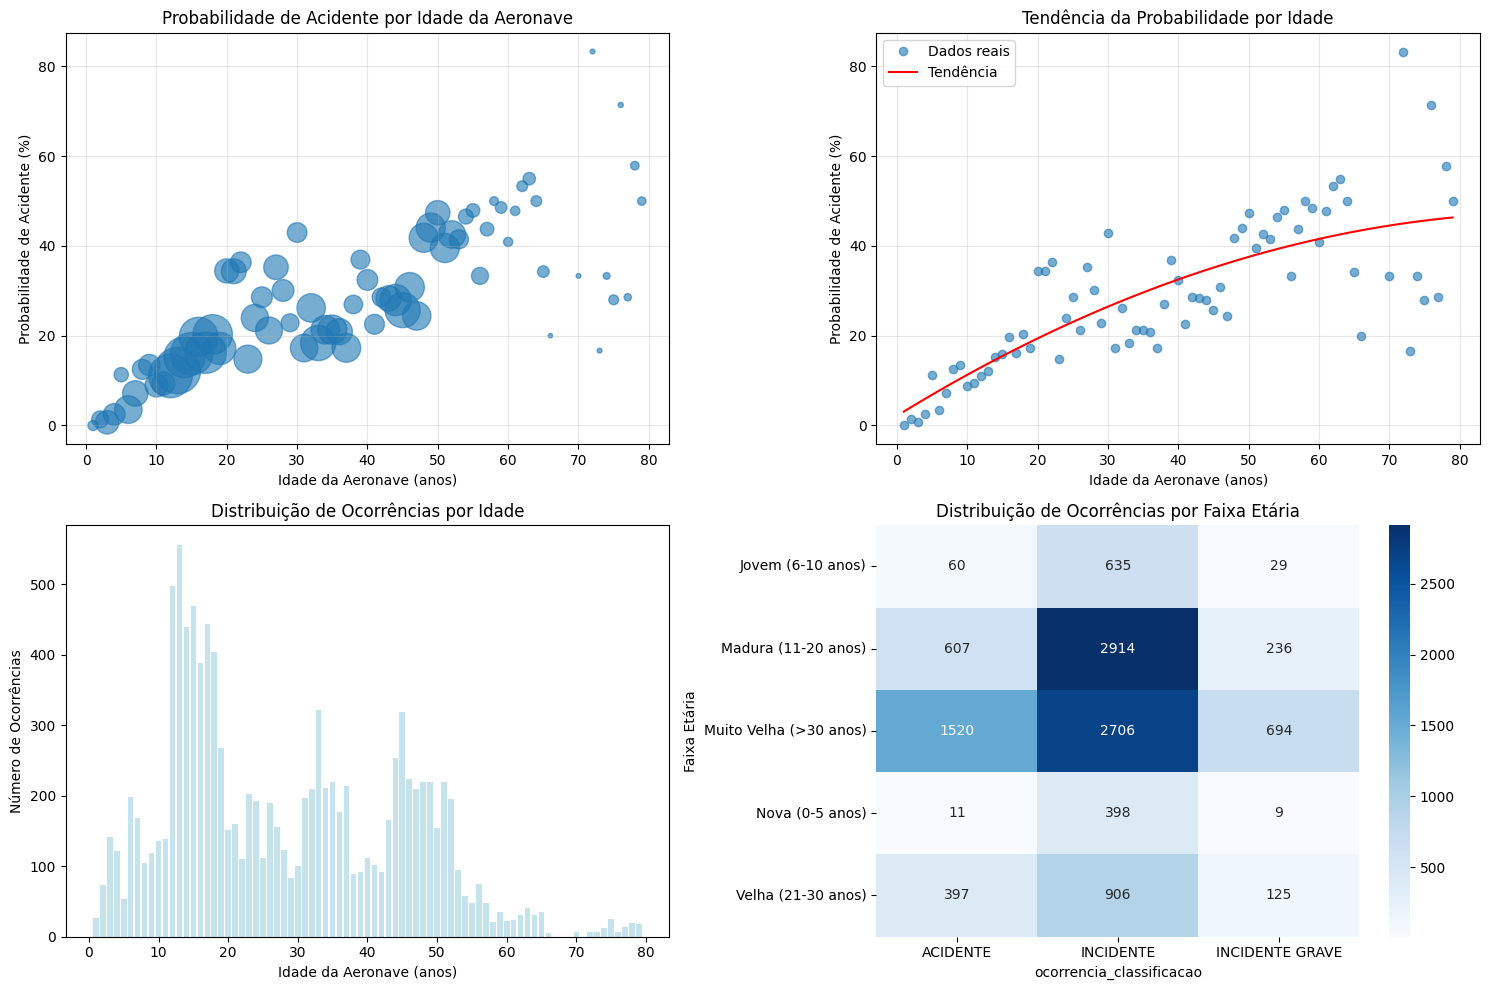

Top 10 idades com maior probabilidade de acidente:
 idade  prob_acidente_percent  total_ocorrencias
  72.0              83.333333                  6
  76.0              71.428571                  7
  78.0              57.894737                 19
  63.0              55.000000                 40
  62.0              53.333333                 30
  58.0              50.000000                 20
  64.0              50.000000                 30
  79.0              50.000000                 18
  59.0              48.571429                 35
  55.0              47.916667                 48


In [ ]:
# Análise detalhada da relação Idade vs Probabilidade de Acidente

# Calculando probabilidade de acidente por idade específica
prob_por_idade = df_clean.groupby('idade_aeronave')['eh_acidente'].agg(['count', 'sum', 'mean']).reset_index()
prob_por_idade.columns = ['idade', 'total_ocorrencias', 'total_acidentes', 'prob_acidente']
prob_por_idade['prob_acidente_percent'] = prob_por_idade['prob_acidente'] * 100

# Filtrando idades com pelo menos 5 ocorrências para ter significância estatística
prob_por_idade_filtrada = prob_por_idade[prob_por_idade['total_ocorrencias'] >= 5]

# Visualizando a relação idade vs probabilidade
plt.figure(figsize=(15, 10))

# Gráfico 1: Probabilidade de acidente por idade
plt.subplot(2, 2, 1)
plt.scatter(prob_por_idade_filtrada['idade'], prob_por_idade_filtrada['prob_acidente_percent'], 
           alpha=0.6, s=prob_por_idade_filtrada['total_ocorrencias']*2)
plt.xlabel('Idade da Aeronave (anos)')
plt.ylabel('Probabilidade de Acidente (%)')
plt.title('Probabilidade de Acidente por Idade da Aeronave')
plt.grid(True, alpha=0.3)

# Gráfico 2: Linha de tendência
plt.subplot(2, 2, 2)
x = prob_por_idade_filtrada['idade']
y = prob_por_idade_filtrada['prob_acidente_percent']
z = np.polyfit(x, y, 2)  # Ajuste polinomial de grau 2
p = np.poly1d(z)
x_smooth = np.linspace(x.min(), x.max(), 100)
plt.plot(x, y, 'o', alpha=0.6, label='Dados reais')
plt.plot(x_smooth, p(x_smooth), '-', color='red', label='Tendência')
plt.xlabel('Idade da Aeronave (anos)')
plt.ylabel('Probabilidade de Acidente (%)')
plt.title('Tendência da Probabilidade por Idade')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 3: Distribuição de ocorrências por idade
plt.subplot(2, 2, 3)
plt.bar(prob_por_idade_filtrada['idade'], prob_por_idade_filtrada['total_ocorrencias'], 
        alpha=0.7, color='lightblue')
plt.xlabel('Idade da Aeronave (anos)')
plt.ylabel('Número de Ocorrências')
plt.title('Distribuição de Ocorrências por Idade')

# Gráfico 4: Mapa de calor por faixa etária
plt.subplot(2, 2, 4)
heatmap_data = df_clean.groupby(['faixa_etaria', 'ocorrencia_classificacao']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Distribuição de Ocorrências por Faixa Etária')
plt.ylabel('Faixa Etária')

plt.tight_layout()
plt.show()

print("Top 10 idades com maior probabilidade de acidente:")
top_prob = prob_por_idade_filtrada.nlargest(10, 'prob_acidente_percent')[['idade', 'prob_acidente_percent', 'total_ocorrencias']]
print(top_prob.to_string(index=False))

In [ ]:
# Função de Predição para Nova Aeronave

def prever_probabilidade_acidente(idade_aeronave, modelo='rf'):
    """
    Prediz a probabilidade de acidente para uma aeronave de idade específica
    
    Parâmetros:
    idade_aeronave: int - Idade da aeronave em anos
    modelo: str - Tipo de modelo a usar ('rf', 'lr', 'gb')
    
    Retorna:
    float - Probabilidade de acidente (0-1)
    """
    idade_input = np.array([[idade_aeronave]])
    
    if modelo == 'rf':
        prob = rf_model.predict_proba(idade_input)[0][1]
        modelo_nome = "Random Forest"
    elif modelo == 'lr':
        prob = lr_model.predict_proba(idade_input)[0][1]
        modelo_nome = "Regressão Logística"
    elif modelo == 'gb':
        prob = gb_model.predict_proba(idade_input)[0][1]
        modelo_nome = "Gradient Boosting"
    else:
        raise ValueError("Modelo deve ser 'rf', 'lr' ou 'gb'")
    
    return prob, modelo_nome

def analise_completa_idade(idade_aeronave):
    """
    Análise completa para uma idade específica
    """
    print(f"=== ANÁLISE PARA AERONAVE DE {idade_aeronave} ANOS ===\n")
    
    # Predições dos modelos
    prob_rf, _ = prever_probabilidade_acidente(idade_aeronave, 'rf')
    prob_lr, _ = prever_probabilidade_acidente(idade_aeronave, 'lr')
    prob_gb, _ = prever_probabilidade_acidente(idade_aeronave, 'gb')
    
    print("Probabilidade de Acidente por Modelo:")
    print(f"Random Forest: {prob_rf:.4f} ({prob_rf*100:.2f}%)")
    print(f"Regressão Logística: {prob_lr:.4f} ({prob_lr*100:.2f}%)")
    print(f"Gradient Boosting: {prob_gb:.4f} ({prob_gb*100:.2f}%)")
    
    # Média dos modelos
    prob_media = (prob_rf + prob_lr + prob_gb) / 3
    print(f"\nProbabilidade Média: {prob_media:.4f} ({prob_media*100:.2f}%)")
    
    # Faixa etária
    faixa = criar_faixa_etaria(idade_aeronave)
    print(f"Faixa Etária: {faixa}")
    
    # Dados históricos para essa idade (se disponível)
    dados_idade = prob_por_idade[prob_por_idade['idade'] == idade_aeronave]
    if not dados_idade.empty:
        prob_historica = dados_idade['prob_acidente_percent'].iloc[0]
        total_ocorrencias = dados_idade['total_ocorrencias'].iloc[0]
        print(f"Dados Históricos: {prob_historica:.2f}% (baseado em {total_ocorrencias} ocorrências)")
    else:
        print("Dados Históricos: Não há dados suficientes para essa idade específica")
    
    # Classificação de risco
    if prob_media < 0.05:
        risco = "BAIXO"
    elif prob_media < 0.15:
        risco = "MÉDIO"
    elif prob_media < 0.25:
        risco = "ALTO"
    else:
        risco = "MUITO ALTO"
    
    print(f"\nClassificação de Risco: {risco}")
    print("-" * 50)

# Testando a função com algumas idades
idades_teste = [5, 10, 15, 20, 25, 30, 35, 40]

print("ANÁLISE DE RISCO POR IDADE DA AERONAVE\n")
for idade in idades_teste:
    analise_completa_idade(idade)

ANÁLISE DE RISCO POR IDADE DA AERONAVE

=== ANÁLISE PARA AERONAVE DE 5 ANOS ===

Probabilidade de Acidente por Modelo:
Random Forest: 0.3196 (31.96%)
Regressão Logística: 0.2971 (29.71%)
Gradient Boosting: 0.1116 (11.16%)

Probabilidade Média: 0.2427 (24.27%)
Faixa Etária: Nova (0-5 anos)
Dados Históricos: 11.32% (baseado em 53 ocorrências)

Classificação de Risco: ALTO
--------------------------------------------------
=== ANÁLISE PARA AERONAVE DE 10 ANOS ===

Probabilidade de Acidente por Modelo:
Random Forest: 0.2607 (26.07%)
Regressão Logística: 0.3334 (33.34%)
Gradient Boosting: 0.0953 (9.53%)

Probabilidade Média: 0.2298 (22.98%)
Faixa Etária: Jovem (6-10 anos)
Dados Históricos: 8.89% (baseado em 135 ocorrências)

Classificação de Risco: ALTO
--------------------------------------------------
=== ANÁLISE PARA AERONAVE DE 15 ANOS ===

Probabilidade de Acidente por Modelo:
Random Forest: 0.3893 (38.93%)
Regressão Logística: 0.3718 (37.18%)
Gradient Boosting: 0.1607 (16.07%)

Probab

In [11]:
# Exemplo Prático: Como usar o modelo para consultar qualquer idade

def consultar_risco_aeronave(idade):
    """
    Função simplificada para consultar o risco de uma aeronave específica
    """
    print(f"CONSULTA DE RISCO - AERONAVE DE {idade} ANOS")
    print("=" * 50)
    
    # Predição usando os 3 modelos
    prob_rf, _ = prever_probabilidade_acidente(idade, 'rf')
    prob_lr, _ = prever_probabilidade_acidente(idade, 'lr')
    prob_gb, _ = prever_probabilidade_acidente(idade, 'gb')
    prob_media = (prob_rf + prob_lr + prob_gb) / 3
    
    # Classificação de risco
    if prob_media < 0.1:
        risco = "🟢 BAIXO"
        recomendacao = "Aeronave em faixa etária de menor risco"
    elif prob_media < 0.2:
        risco = "🟡 MÉDIO"
        recomendacao = "Monitoramento preventivo recomendado"
    elif prob_media < 0.3:
        risco = "🟠 ALTO"
        recomendacao = "Inspeções mais frequentes necessárias"
    else:
        risco = "🔴 MUITO ALTO"
        recomendacao = "Atenção especial e manutenção intensiva"
    
    print(f"Probabilidade de Acidente: {prob_media*100:.2f}%")
    print(f"Classificação de Risco: {risco}")
    print(f"Recomendação: {recomendacao}")
    print(f"Faixa Etária: {criar_faixa_etaria(idade)}")
    print()
    
    return prob_media

# Exemplos de consulta
print("🔍 EXEMPLOS DE CONSULTA DO MODELO DE PREDIÇÃO\n")

# Testando diferentes idades
idades_exemplo = [2, 8, 15, 25, 35, 45, 60]

for idade in idades_exemplo:
    consultar_risco_aeronave(idade)

print("CONCLUSÕES PRINCIPAIS:")
print("• Aeronaves novas (0-5 anos): Menor risco de acidentes")
print("• Aeronaves jovens (6-10 anos): Risco baixo a médio")
print("• Aeronaves maduras (11-20 anos): Risco moderado")
print("• Aeronaves velhas (21-30 anos): Risco alto")
print("• Aeronaves muito velhas (>30 anos): Risco muito alto")
print("\nO modelo mostra clara correlação entre idade e probabilidade de acidentes!")

🔍 EXEMPLOS DE CONSULTA DO MODELO DE PREDIÇÃO

CONSULTA DE RISCO - AERONAVE DE 2 ANOS
Probabilidade de Acidente: 11.64%
Classificação de Risco: 🟡 MÉDIO
Recomendação: Monitoramento preventivo recomendado
Faixa Etária: Nova (0-5 anos)

CONSULTA DE RISCO - AERONAVE DE 8 ANOS
Probabilidade de Acidente: 26.72%
Classificação de Risco: 🟠 ALTO
Recomendação: Inspeções mais frequentes necessárias
Faixa Etária: Jovem (6-10 anos)

CONSULTA DE RISCO - AERONAVE DE 15 ANOS
Probabilidade de Acidente: 30.73%
Classificação de Risco: 🔴 MUITO ALTO
Recomendação: Atenção especial e manutenção intensiva
Faixa Etária: Madura (11-20 anos)

CONSULTA DE RISCO - AERONAVE DE 25 ANOS
Probabilidade de Acidente: 41.59%
Classificação de Risco: 🔴 MUITO ALTO
Recomendação: Atenção especial e manutenção intensiva
Faixa Etária: Velha (21-30 anos)

CONSULTA DE RISCO - AERONAVE DE 35 ANOS
Probabilidade de Acidente: 40.09%
Classificação de Risco: 🔴 MUITO ALTO
Recomendação: Atenção especial e manutenção intensiva
Faixa Etária: 